In [7]:
import pandas as pd;
df = pd.read_csv('reviews.csv',sep='|')
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import sklearn
from sklearn.feature_extraction.text import CountVectorizer

import string 


def remove_punctuations(text):
    
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

#df['text'] = df['text'].apply(remove_punctuations) #remove punctuations
#df['text'] = df['text'].str.replace('\d+', '') #remove nums
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df.label[df['label'] == "negative"] = 0
df.label[df['label'] == "positive"] = 1
y = df['label']
y = y.astype('int')
test = df['text']

from sklearn.externals import joblib
vectorizer = joblib.load('vectortest2.sav')
#len(bow_transformer.vocabulary_)

testdata=df.iloc[4::5, :]

Xtest = testdata['text']
y_test = testdata['label']

traindata = df.drop(testdata.index)
Xtrain = traindata['text']
y_train = traindata['label']

X_train = vectorizer.transform(Xtrain)
X_test = vectorizer.transform(Xtest)

y_train=y_train.astype('int')
y_test=y_test.astype('int')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nihagajam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [9]:
predictions = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

0.7786390288421868
[[31025  8949]
 [ 8757 31256]]


             precision    recall  f1-score   support

          0       0.78      0.78      0.78     39974
          1       0.78      0.78      0.78     40013

avg / total       0.78      0.78      0.78     79987



In [10]:
from sklearn.externals import joblib
saved_model = 'DecisionTreeModel.sav'
joblib.dump(clf,saved_model)

['DecisionTreeModel.sav']

In [16]:
# Compute ROC curve and ROC area for each class
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
y_score = joblib.load('DecisionTreeModel.sav').predict(X_test)

In [17]:
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds  = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

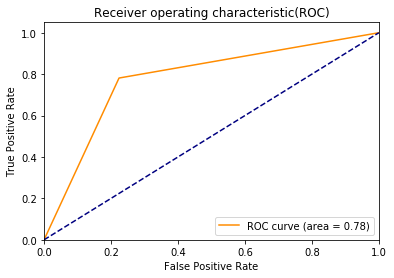

In [18]:
#print roc_auc_score(y_test, y_score)
plt.figure()
#plt.plot(fpr[0], tpr[0],color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC)')
plt.legend(loc="lower right")
plt.show()

In [26]:
y_proba = joblib.load('DecisionTreeModel.sav').predict_proba(X_test)

In [27]:
import matplotlib.pyplot as plt
fpr= dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_proba[:,i],pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [28]:
y_proba

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

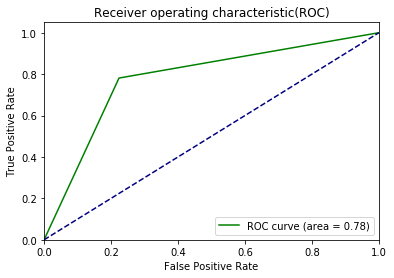

In [30]:
#print roc_auc_score(y_test, y_score)
plt.figure()
#plt.plot(fpr[0], tpr[0],color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1],color='green',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC)')
plt.legend(loc="lower right")
plt.show()

In [31]:
len(vectorizer.vocabulary_)

259884

In [33]:
len(Xtest)

79987

In [34]:
len(Xtrain)

319952

In [36]:
X_train

<319952x259884 sparse matrix of type '<class 'numpy.int64'>'
	with 12417327 stored elements in Compressed Sparse Row format>

In [38]:
model = joblib.load('DecisionTreeModel.sav')

In [40]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

KeyboardInterrupt: 

In [42]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None,max_depth = 3) 
graph = graphviz.Source(dot_data) 
graph.render("iris2") 

'iris2.pdf'